In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from pathlib import Path

In [49]:
# root_path = "/media/Datacenter_storage/Ji/mayo_yolo_resampled/yolo_dataset"
root_path="/media/Datacenter_storage/Ji/brain_mri_valdo_mayo/mayo_yolo_all_sequence"
task = "test"

### Dataset Visualization

In [50]:
# Image path
# /images/train/sub-101_slice_009.png
img_num = "5929128"
slice_num = "20"

# 5075599_4
# /media/Datacenter_storage/Ji/brain_mri_valdo_mayo/mayo_yolo_all_sequence/images/test/12595866_26.png

### Fixed Size Ground Truth Box

In [51]:
def plot_yolo_boxes_with_channel_patches(image_path, bboxes):
    """
    Plot original channels and their 16x16 patches without overlap
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The image file does not exist: {image_path}")
    
    try:
        image = Image.open(image_path)
        image = np.array(image)
    except Exception as e:
        raise IOError(f"Error reading the image: {e}")
    
    if len(image.shape) == 2:
        image = np.stack((image,) * 3, axis=-1)
    height, width = image.shape[:2]
    n_boxes = len(bboxes)
    
    if n_boxes == 0:
        print("No bounding boxes found in the image.")
        return
        
    # Create figure with original image row plus one row per bbox
    fig = plt.figure(figsize=(15, 4 * (n_boxes + 1)))

    # Create GridSpec with n_boxes + 1 rows (1 for original images, rest for patches)
    gs = plt.GridSpec(n_boxes + 1, 3, figure=fig, hspace=0.4)

    # Channel names
    channel_names = ['T1', 'T2', 'T2S']

    # Plot each channel
    for channel_idx, channel_name in enumerate(channel_names):
        # Extract channel
        channel = image[:, :, channel_idx]

        # Plot full image in top row
        ax = fig.add_subplot(gs[0, channel_idx])
        im = ax.imshow(channel, cmap='gray')
        ax.set_title(f'{channel_name}')
        ax.set_xticks([])  # Remove x-axis tick numbers
        ax.set_yticks([])  # Remove y-axis tick numbers
        plt.colorbar(im, ax=ax, label='Intensity')
        
        # Draw all bounding boxes on original image
        for bbox in bboxes:
            class_id, x_center, y_center, gt_width, gt_height = bbox
            center_x = int(x_center * width)
            center_y = int(y_center * height)
            
            patch_size = gt_width * width
            
            # Draw fixed-size box
            half_size = patch_size // 2
            x_min = center_x - half_size
            y_min = center_y - half_size
            
            rect = plt.Rectangle((x_min, y_min), patch_size, patch_size,
                               linewidth=0.3, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
        
        # Plot patches
        for box_idx, bbox in enumerate(bboxes):
            _, x_center, y_center, gt_width, gt_height = bbox
            center_x = int(x_center * width)
            center_y = int(y_center * height)
            
            # Extract patch
            patch_size = gt_width * width
            patch = extract_patch(channel, center_x, center_y, patch_size)
            # Create subplot for patch in its own row
            ax_patch = fig.add_subplot(gs[box_idx + 1, channel_idx])
            im_patch = ax_patch.imshow(patch, cmap='gray')
            ax_patch.set_title(f'{channel_name} Patch {box_idx + 1}')
            ax_patch.set_xticks([])  # Remove x-axis tick numbers
            ax_patch.set_yticks([])  # Remove y-axis tick numbers
            plt.colorbar(im_patch, ax=ax_patch, label='Intensity')
    
    plt.suptitle('Ground Truth', fontsize=16, y=0.95)
    plt.tight_layout()
    plt.show()

def plot_original_image(img_path):    
    img = Image.open(img_path)
    img = np.array(img)
    
    print(img.shape)
    plt.figure(figsize=(10, 10))

    plt.subplot(1,3,1)
    plt.imshow(img[:,:,0], cmap='gray')
    plt.xticks([])  # Remove x-axis tick numbers
    plt.yticks([])  # Remove y-axis tick numbers

    plt.subplot(1,3,2)
    plt.imshow(img[:,:,1], cmap='gray')
    plt.xticks([])  # Remove x-axis tick numbers
    plt.yticks([])  # Remove y-axis tick numbers

    plt.subplot(1,3,3)
    plt.imshow(img[:,:,2], cmap='gray')
    plt.xticks([])  # Remove x-axis tick numbers
    plt.yticks([])  # Remove y-axis tick numbers

(1024, 1024, 3)
An error occurred: [Errno 2] No such file or directory: '/media/Datacenter_storage/Ji/brain_mri_valdo_mayo/mayo_yolo_all_sequence/labels/test/5929128_20.txt'
Image format: PNG
Image size: (1024, 1024)
Image mode: RGB


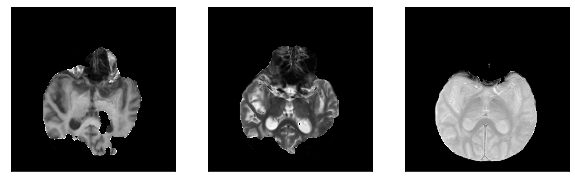

In [52]:
visualize_image_channels_and_patches(root_path, img_num, slice_num)

In [53]:
def find_nonempty_text_files(directory):
    nonempty_files = []
    dir_path = Path(directory)
    for txt_file in dir_path.glob("*.txt"):
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)  
    return sorted(nonempty_files)  # Sort alphabetically

task = "test"
directory = f"{root_path}/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

count = 0
print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    count += 1
    print(f"- {filename}")
print(count)

Found 28 non-empty text files:
- 10745491_24.txt
- 10745491_28.txt
- 10745491_29.txt
- 10745491_30.txt
- 10745491_33.txt
- 10745491_34.txt
- 10745491_8.txt
- 12235430_16.txt
- 12235430_17.txt
- 4817777_29.txt
- 4817777_30.txt
- 4817777_31.txt
- 4906587_18.txt
- 4906587_19.txt
- 4918736_11.txt
- 4918736_12.txt
- 4918736_13.txt
- 4918736_24.txt
- 4918736_25.txt
- 4918736_26.txt
- 5808373_17.txt
- 5808373_18.txt
- 5929128_12.txt
- 5929128_21.txt
- 5929128_22.txt
- 5929128_25.txt
- 5929128_8.txt
- 6780698_27.txt
28
